In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
import math
import scipy.stats as st
import seaborn as sns

In [2]:
data_frame = pandas.read_csv("data_packed.csv")

In [3]:
# for learning purposes malform one data column
# data_frame["Solidity"] += np.array(np.random.chisquare(5, (30,)))
# data_frame["Solidity"] /= data_frame["Solidity"].max()
# data_frame.to_csv("data_packed.csv")

In [4]:
data_frame

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Solidity,Roundness
0,56276.0,888.242,326.1485,220.2388,0.534473,0.8963
1,76631.0,1068.146,417.1932,234.2289,0.543122,0.8440
2,71623.0,1082.987,435.8328,211.0457,0.171792,0.7674
3,66458.0,992.051,381.5638,222.5322,0.886556,0.8486
4,66107.0,998.146,383.8883,220.4545,0.528369,0.8338
5,73191.0,1041.460,405.8132,231.4261,0.806201,0.8480
6,73338.0,1020.055,392.2516,238.5494,0.273458,0.8857
7,69692.0,1049.108,421.4875,211.7707,1.000000,0.7957
8,95727.0,1231.609,488.1199,251.3086,0.807301,0.7930
9,73465.0,1047.767,413.6504,227.2644,0.901012,0.8409


In [5]:
def bucketize(
    data: List[float], explicit_bucket_count: int = None
) -> Tuple[List[str], List[float]]:
    """Classifies given data into len(data) // 4 + 1 categories,
    returns list of category range labels and list of list of values in
    categories.
    """
    max_val = max(data) * 1.1
    min_val = min(data) * 0.9
    if explicit_bucket_count is None:
        bucket_count: int = len(data) // 4 - 1
    else:
        bucket_count = explicit_bucket_count
    span: float = abs(max_val - min_val)
    bucket_size: float = span / bucket_count
    buckets: Dict[Tuple[float, float], List[float]] = {}

    for i in range(bucket_count):
        bucket_min = min_val + i * bucket_size
        bucket_max = min_val + (i + 1) * bucket_size
        buckets[bucket_min, bucket_max] = []
    else:
        last_bucket = buckets[bucket_min, bucket_max]

    for value in data:
        # small faux-pass here: order is not guaranteed on every runtime environment
        # however with CPython 3.6+ dictionary impl keeps order of insertions.
        # MAY be a problem with Jython or PyPy or older CPython versions
        # Btw see https://www.hyrumslaw.com/
        for (bucket_min, bucket_max), bucket in buckets.items():
            if bucket_min <= value <= bucket_max:
                bucket.append(value)
                break
        else:
            last_bucket.append(value)

    return list(buckets.keys()), list(buckets.values())


def draw_bucketized(column, column_tag, bucket_count=None):
    labels, values = bucketize(column, bucket_count)
    bar_width = (labels[0][1] - labels[0][0]) * 0.7
    center_labels = [sum(l) / 2 for l in labels]

    plt.figure(figsize=(12, 6), dpi=100)
    plt.bar(
        center_labels,
        height=[len(v) for v in values],
        width=bar_width,
        color="gray",
    )
    kde = st.gaussian_kde(column)
    plt.axvline(np.mean(column), c="r")
    plt.axvline(np.median(column), c="y")
    plt.axvline(np.quantile(0.25), c="g")
    plt.axvline(np.quantile(0.75), c="g")
    plt.xticks(
        center_labels,
        [f"<{round(l[0], 3)}; {round(l[1], 3)})" for l in labels],
    )
    plt.title(column_tag)


In [6]:
def draw_bucketized(data, col):
    n, bins = np.histogram(data, bins=len(data) // 4)

    bins_rounded = []
    for value in bins:
        bins_rounded.append(round(value, 2))

    sns.histplot(data, bins=bins_rounded, kde=True)
    plt.axvline(np.mean(column), c="r")
    plt.axvline(np.median(column), c="y")
    plt.axvline(np.quantile(column, 0.25), c="g")
    plt.axvline(np.quantile(column, 0.75), c="g")
    plt.title(f"{col}")
    plt.xticks(bins_rounded)

In [17]:
A_TABLE = [
    0.4254,
    0.2944,
    0.2487,
    0.2148,
    0.187,
    0.163,
    0.1415,
    0.1219,
    0.1036,
    0.0862,
    0.0697,
    0.0537,
    0.0381,
    0.0227,
    0.0076,
]


def is_normal_dist(data_column):
    mean = data_column.mean()
    data_list = data_column.tolist()
    S_sq = sum((x - mean) ** 2 for x in data_list)
    m = math.floor(len(data_list) / 2)
    b = sum(A_TABLE[i] * (data_list[-1 - i] - data_list[i]) for i in range(m))
    W = b**2 / S_sq
    print(b, b**2, S_sq, W)
    return W > 0.927


In [18]:
not_sane_column_tags = []

for col in data_frame.columns:
    column = data_frame[col].sort_values()
    print(column.describe())
    is_norm = is_normal_dist(column)
    print("Is normal distribution:", is_norm)
    if is_norm:
        continue
    not_sane_column_tags.append(col)


count       30.000000
mean     71140.933333
std      10341.786846
min      56276.000000
25%      61680.500000
50%      70542.500000
75%      76491.500000
max      95727.000000
Name: Area, dtype: float64
54422.51189999999 2961809801.5056405 3101624099.8666673 0.9549222298191979
Is normal distribution: True
count      30.000000
mean     1031.695800
std        82.184507
min       888.242000
25%       956.115500
50%      1038.389000
75%      1087.008500
max      1231.609000
Name: Perimeter, dtype: float64
436.28810919999995 190347.31422931107 195874.5036928 0.9717819861223107
Is normal distribution: True
count     30.000000
mean     405.727717
std       37.715417
min      326.148500
25%      373.844425
50%      407.821600
75%      434.491025
max      488.119900
Name: Major_Axis_Length, dtype: float64
201.68715262999993 40677.70753599689 41251.127274441664 0.9860992953082265
Is normal distribution: True
count     30.000000
mean     223.570147
std       16.179514
min      197.455400
25%     

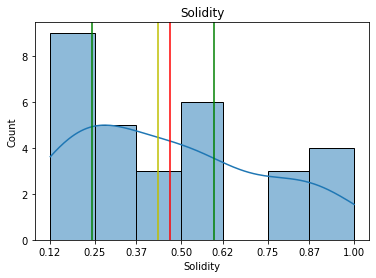

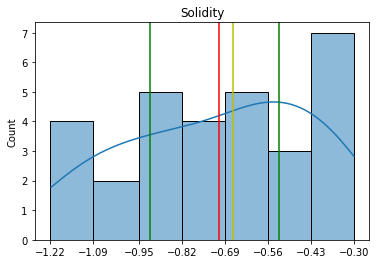

In [9]:
df_cp = data_frame.copy(True)

for tag in not_sane_column_tags:
    column = df_cp[tag].sort_values()
    draw_bucketized(column, tag)
    plt.show()
    if tag == "Solidity":
        column = np.array([np.log10(x * 0.5) for x in column])  # 2
    draw_bucketized(column, tag)
    plt.show()

    df_cp[tag] = column
    df_cp.rename({tag: tag + "*"})


- nie jest wielomodalny
- zbliżony do symetrycznego -> zmienną zostawiamy w spokoju
- jedno modalny, już nie skośny
- bral punktu odbiegającego

In [10]:
df_cp.to_csv("post_proc_data.csv")

In [11]:
stats_df = []

for tag in df_cp.columns:
    column = df_cp[tag]
    stats_df.append(
        [
            tag,
            column.quantile(0.25),
            column.quantile(0.75),
        ]
    )

stats_df = pandas.DataFrame(stats_df, columns=["Var", "Q1", "Q3"])


In [12]:
def cor(x: np.array, y: np.array) -> float:
    x_mean = x.mean()
    y_mean = y.mean()
    return sum(
        (x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x, y)
    ) / np.sqrt(
        sum((x_i - x_mean) ** 2 for x_i in x)
        * sum((y_i - y_mean) ** 2 for y_i in y)
    )


N = len(df_cp.columns)

cor_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        cor_matrix[i, j] = cor(df_cp.iloc[:,i], df_cp.iloc[:,j])


In [13]:
for c in cor_matrix:
    for r in c:
        print(f"{r:> 4.3f} ", end="")
    print()

 1.000  0.966  0.888  0.839 -0.067 -0.254 
 0.966  1.000  0.972  0.679 -0.108 -0.495 
 0.888  0.972  1.000  0.499 -0.056 -0.649 
 0.839  0.679  0.499  1.000 -0.086  0.284 
-0.067 -0.108 -0.056 -0.086  1.000  0.140 
-0.254 -0.495 -0.649  0.284  0.140  1.000 


<AxesSubplot:>

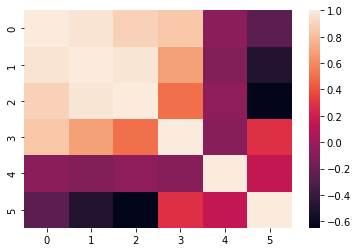

In [14]:
import seaborn as sns

sns.heatmap(cor_matrix)

In [15]:
stats_df.to_excel("data.xlsx")

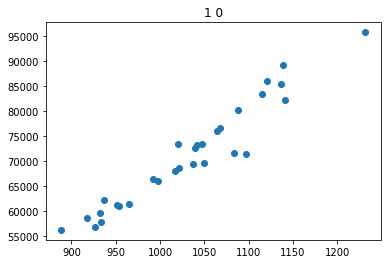

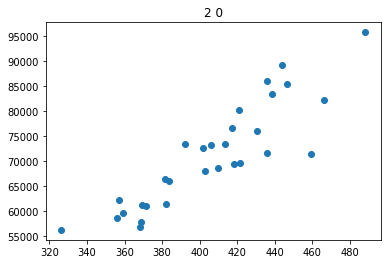

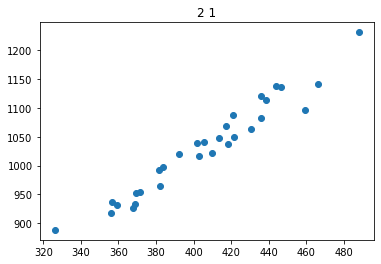

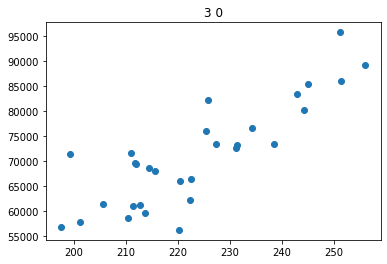

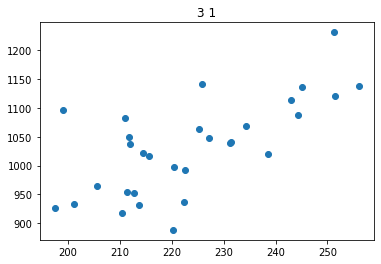

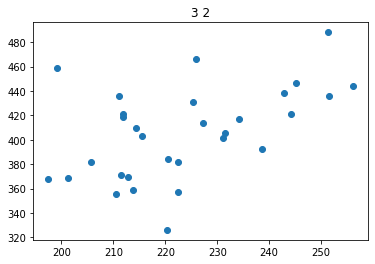

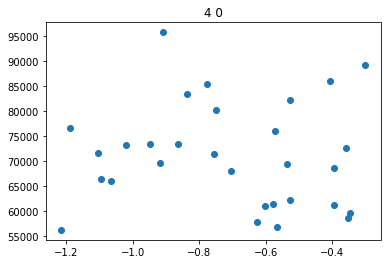

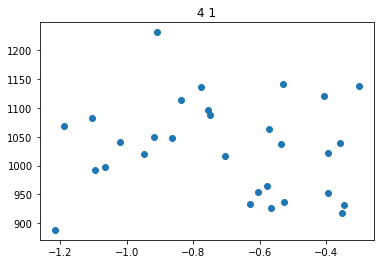

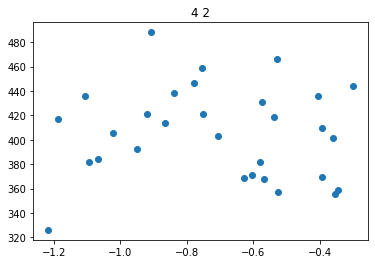

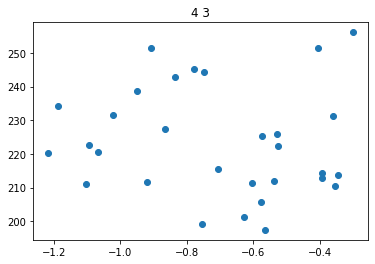

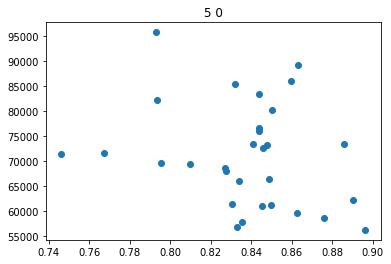

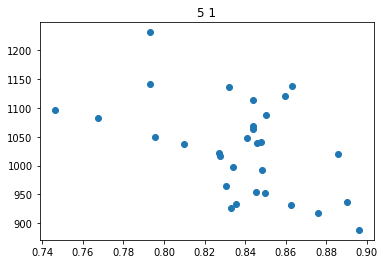

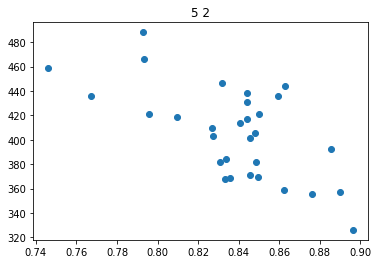

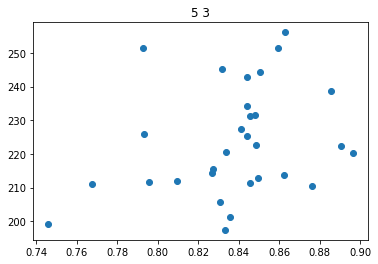

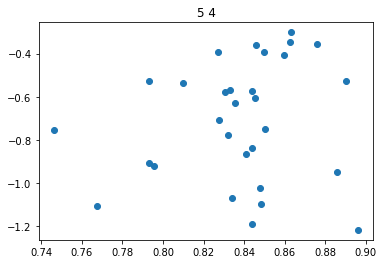

In [16]:
N = len(df_cp.columns)

for i in range(N):
    for j in range(N):
        if i > j:
            plt.title(f"{i} - {j}")
            plt.scatter(df_cp.iloc[:, i], df_cp.iloc[:, j])
            plt.show()
        else:
            break